# Task
### Objective
 To categorize the countries using socio-economic and health factors that determine the overall development of the country.

### Problem Statement:
HELP International has been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively.
Hence, your Job as a Data scientist is to categorize the countries using some socio-economic and health factors that determine the overall development of the country.

### Task:
1. use K-means clustering and Hierarchical clustering to cluster the country into groups.
please choose the number of the cluster in a rational reason
2. use PCA to reduce the dimension to 2d, and visualize the cluster from K-means and Hierarchical clustering respectively
3. please write the suggestion to CEO about the country you suggest

In [26]:
#IMPORTS
import numpy as np
import pandas as pd

#Create dataframe
df  = pd.read_csv("country.csv")

# Set up
### Data cleaning

In [27]:
#Check for null cells
df.isnull().sum()

#No null cells, can continue

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

### Preprocessing

In [28]:
#Ignore column "country" cause it is not numeric and therefore can't be used for clustering.
numeric_col = ["child_mort", "exports" ,"health" ,"imports","income","inflation","life_expec","total_fer","gdpp"]
df_num = df[numeric_col]
df_num.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,26.1,46.7,5.44,56.7,7710,39.20,66.2,2.64,2650
1,76.7,19.7,6.32,17.2,3370,19.60,66.3,4.88,1480
2,90.5,22.8,6.59,34.9,1030,12.10,53.1,5.31,459
3,4.5,76.4,10.70,74.7,41100,1.88,80.0,1.86,44400
4,116.0,41.1,7.91,49.6,609,20.80,57.5,6.54,334


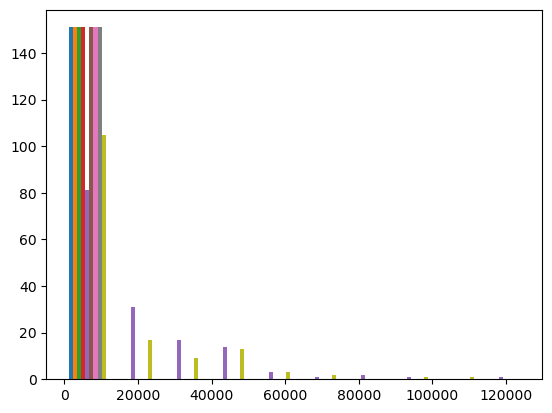

In [29]:
#Visualize pre-scaled features by showing histogram
import matplotlib.pyplot as plt
plt.hist(df_num, bins=10)
plt.show()

In [30]:
#Scale data
#Data needs to be scaled so distance can be calculated correctly (because GDP is much larger than life expectancy for example)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
#fit and transform data
scaled = scaler.fit_transform(df_num)
#turn transformed data back into a dataframe
df_scaled = pd.DataFrame(scaled, columns=df_num.columns)


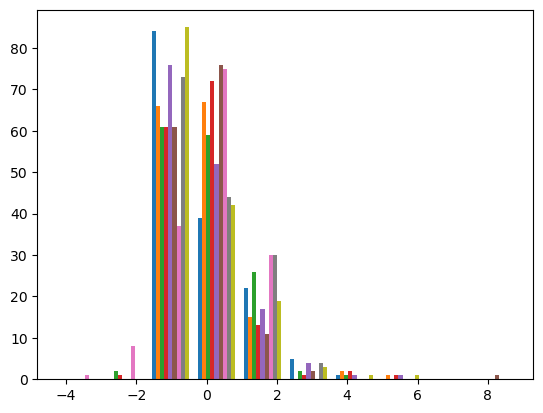

In [31]:
#Visualize scaled features by showing histogram
plt.hist(df_scaled, bins=10)
plt.show()

# 1: K-means clustering & Hierarchical clustering


## Find optimal number of clusters using Elbow method


c:\Users\julia\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


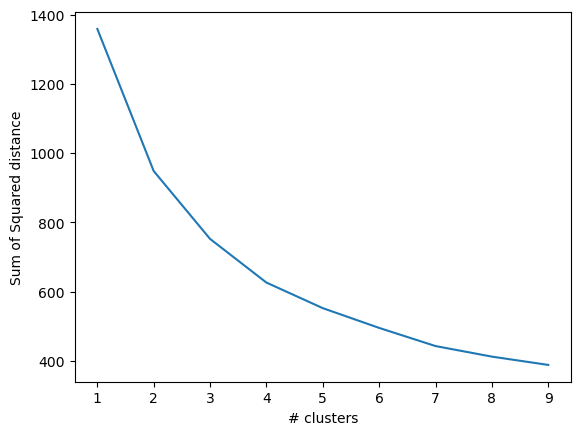

In [32]:
from sklearn.cluster import KMeans

sumsSquaredDis=[]
#Try out anything between 1 and 10 clusters
K=range(1,10)
for i in K:
    #make clusters
    kmean=KMeans(n_clusters=i)
    kmean.fit(df_scaled)
    #record how much the sum of squared distances is
    sumsSquaredDis.append(kmean.inertia_)
    
plt.plot(K,sumsSquaredDis)
plt.xlabel('# clusters')
plt.ylabel('Sum of Squared distance')
plt.show()

k = 5

## K-Means Clustering

In [33]:
kmeans = KMeans(n_clusters=k)
kmeans_labels = kmeans.fit_predict(df_scaled)
print(kmeans_labels)

[0 1 1 3 1 3 0 0 0 1 1 0 0 1 1 0 1 0 0 0 1 1 0 1 0 0 0 3 0 0 0 0 1 0 0 1 0
 0 0 0 3 1 0 3 3 3 1 1 3 0 1 1 1 1 3 0 3 3 0 0 0 1 0 0 0 3 1 1 3 3 0 1 0 0
 0 0 2 0 3 3 0 1 0 1 1 0 3 0 3 0 0 1 0 3 0 2 0 3 0 0 1 1 0 3 3 1 0 0 0 3 0
 2 0 0 1 0 0 3 3 1 0 3 1 0 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0 3 3 0 1 4 0 1 3 0
 0 0 0]


## Hierarchical clustering

In [34]:
from sklearn.cluster import AgglomerativeClustering

hierarchical = AgglomerativeClustering(n_clusters=k)
hierarchical_labels = hierarchical.fit_predict(df_scaled)
print(hierarchical_labels)

[4 4 0 2 0 2 4 4 1 0 0 1 1 0 4 1 0 1 4 1 0 4 1 0 1 4 1 1 4 4 4 1 0 1 2 0 1
 1 1 4 2 4 4 2 2 2 4 0 2 1 0 1 0 0 2 1 2 2 1 1 1 0 4 4 1 2 0 4 1 2 4 0 2 1
 4 1 3 4 2 1 1 1 4 0 0 1 2 1 2 4 2 0 1 2 1 3 1 2 1 1 0 0 1 2 2 0 1 4 1 2 1
 3 4 4 0 1 1 2 2 4 1 2 0 1 4 1 4 1 1 4 0 4 4 0 0 0 2 4 1 2 2 1 0 0 4 0 2 1
 4 1 1]


# 2: PCA and Visualization


In [35]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
df_2d = pca.fit_transform(df_scaled)




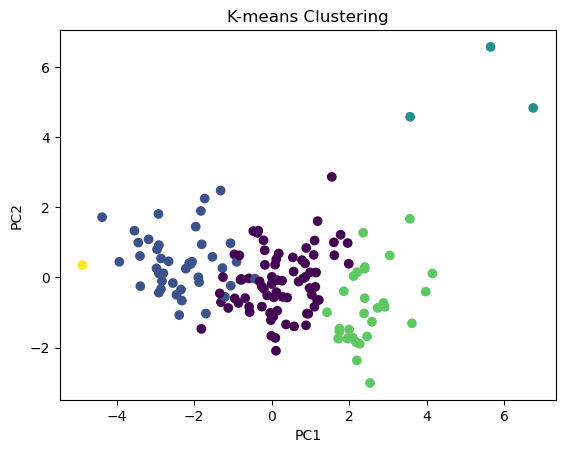

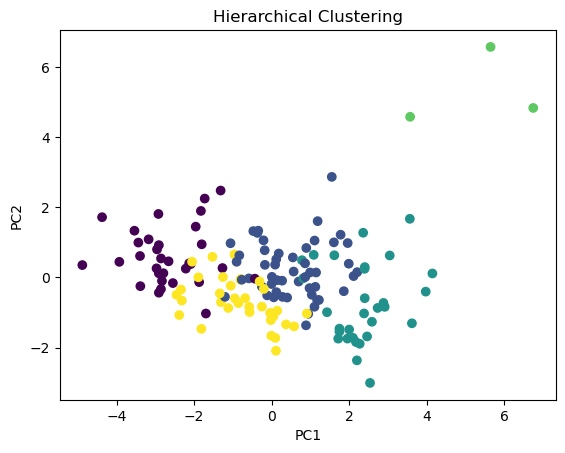

In [36]:
# Plot K-means clusters
plt.scatter(df_2d[:, 0], df_2d[:, 1], c=kmeans_labels)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('K-means Clustering')
plt.show()

# Plot Hierarchical clusters
plt.scatter(df_2d[:, 0], df_2d[:, 1], c=hierarchical_labels)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Hierarchical Clustering')
plt.show()

# 3: Suggestion
I suggest we split the 10$ Million according to the XXXX clusters the data analysis identified.

